In [1]:
# all imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [3]:
df = pd.read_csv("Iris.csv")

In [4]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
# select features and target
X = df.drop('variety', axis=1)  # input features
y = df['variety']  # target variable (flower variety)


In [9]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# create and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [11]:
# predict on test data
y_pred = model.predict(X_test)


In [12]:
# compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


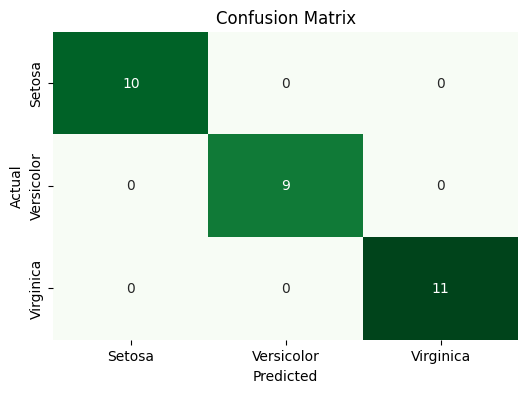

In [13]:
# display confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [14]:
# for multi-class classification, compute metrics using macro averaging
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", round(accuracy, 2))
print("Error Rate:", round(error_rate, 2))
print("Precision (macro avg):", round(precision, 2))
print("Recall (macro avg):", round(recall, 2))


Accuracy: 1.0
Error Rate: 0.0
Precision (macro avg): 1.0
Recall (macro avg): 1.0


In [15]:
# Calculate TP, FP, FN, TN for each class
for i, label in enumerate(model.classes_):
    TP = cm[i, i]  # correctly predicted as class i
    FP = cm[:, i].sum() - TP  # predicted as class i, but not actually i
    FN = cm[i, :].sum() - TP  # actual class i, but predicted as something else
    TN = cm.sum() - (TP + FP + FN)  # everything else
    print(f"\nClass: {label}")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")



Class: Setosa
True Positives (TP): 10
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 20

Class: Versicolor
True Positives (TP): 9
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 21

Class: Virginica
True Positives (TP): 11
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 19


In [16]:
# Predict using the model
y_pred = model.predict(X_test)

# Show predictions (optional)
print("Predicted Labels:\n", y_pred)


Predicted Labels:
 ['Versicolor' 'Setosa' 'Virginica' 'Versicolor' 'Versicolor' 'Setosa'
 'Versicolor' 'Virginica' 'Versicolor' 'Versicolor' 'Virginica' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Virginica' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Virginica' 'Virginica' 'Virginica' 'Virginica' 'Setosa' 'Setosa']
